In [1]:
import os

import numpy as np

from image_series import *
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
import cv2

## using image_series

## init
note that the image series class has save options that are set to False by default.

In [51]:
import os

import numpy as np

from image_series import *
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cv2

path = r"C:\Users\user\Desktop\work\test_with_victor\raw_images"
# path = r"C:\Users\user\Desktop\work\test_with_victor15 images\raw"
IS = image_series(path, Optical_Flow_window=15, orientation_window=45,
    save_defects=True,
    save_orientation=True,
    save_flow=True,
    save_velocity= True)

In [53]:
IS.detect_defects()

C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plushalf['from_img'] = self.name
C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minushalf['from_img'] = self.name
C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

(    charge       x       y  x_ind  y_ind      ang1  ang2  ang3        from_img
 51     0.5  1111.0    20.0   1111     20  3.519022   NaN   NaN  Trans__s2_0220
 52     0.5   560.0    74.0    560     74  3.461871   NaN   NaN  Trans__s2_0220
 53     0.5   746.0    86.0    746     86 -0.365567   NaN   NaN  Trans__s2_0220
 54     0.5   621.0   246.0    621    246  1.317797   NaN   NaN  Trans__s2_0220
 55     0.5   165.0   251.0    165    251 -0.819881   NaN   NaN  Trans__s2_0220
 ..     ...     ...     ...    ...    ...       ...   ...   ...             ...
 86     0.5  1649.0  1788.0   1649   1788  0.887341   NaN   NaN  Trans__s2_0224
 87     0.5   230.0  1856.0    230   1856  3.050884   NaN   NaN  Trans__s2_0224
 88     0.5  1447.0  1907.0   1447   1907  4.700128   NaN   NaN  Trans__s2_0224
 89     0.5  1717.0  1966.0   1717   1966  4.079582   NaN   NaN  Trans__s2_0224
 90     0.5  1098.0  1979.0   1098   1979  2.918281   NaN   NaN  Trans__s2_0224
 
 [233 rows x 9 columns],
     charge  

### running optical flow 
uses the `Optical_Flow_window` as the window size or can set window size when using the function.

In [47]:
IS.run_all()

C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plushalf['from_img'] = self.name
C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minushalf['from_img'] = self.name
C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [27]:
IS.optical_flow()

### plot

In [28]:
im_path = r"C:\Users\user\Desktop\work\test_with_victor\raw_images\Trans__s2_0220.tif"
im_path = r"C:\Users\user\Desktop\work\test_with_victor15 images\raw\Trans__s2_0234.tif"
# im_path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\hbec\Trans__s2_0003.tif"
raw = cv2.imread(im_path)[:,:,0]

In [29]:
%matplotlib qt
plt.imshow(raw,cmap='gray',origin='lower')

In [30]:
# flow1_path = r"C:\Users\user\Desktop\work\check\velocity\velocity_from_Trans__450.npy"
# flow1_path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\velocity\velocity_from_Trans__s2_0003.npy"
flow1_path = r"C:\Users\user\Desktop\work\test_with_victor\velocity\velocity_from_Trans__s2_0220.npy"
flow1_path = r"C:\Users\user\Desktop\work\test_with_victor15 images\velocity\velocity_from_Trans__s2_0234.npy"
flow1 = np.load(flow1_path)

step = 30
x = np.arange(0, raw.shape[1], step, dtype=np.int16)
y = np.arange(0, raw.shape[0], step, dtype=np.int16)
fig = plt.figure(figsize=(10,10))
plt.imshow(raw, cmap="gray")
plt.quiver(x,y, 
    flow1[:,:,0][::step,::step], #x-axis 
    -flow1[:,:,1][::step,::step,], #y-axis
    color="red",scale=200,alpha=0.5)


## orientation

In [31]:
IS.calc_orientation()

### plot

In [32]:
pix_x = raw.shape[0]
pix_y = raw.shape[1]

x = np.arange(0,pix_x)
y = np.arange(0,pix_y)

xx, yy = np.meshgrid(x, y)

# ori_path = r"C:\Users\user\Desktop\work\check\orientation\orientation_from_Trans__450.npy"
# ori_path = r"C:\Users\user\Desktop\work\test\orientation\orientation_from_Trans__s2_0003.npy"
ori_path = r"C:\Users\user\Desktop\work\test_with_victor\orientation\orientation_from_Trans__s2_0220.npy"
ori = np.load(ori_path)
fig, axs = plt.subplots(1,2, figsize=(15, 6))
axs[1].hist(ori.ravel(), bins=30, rwidth=.9)
plt.ylabel('$count$')
plt.xlabel('$angle~(rad)$')
axs[0].imshow(ori, cmap="jet")

## detect defects

In [33]:
IS.path

'C:\\Users\\user\\Desktop\\work\\test_with_victor15 images\\raw'

In [35]:
IS.detect_defects()

C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plushalf['from_img'] = self.name
C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minushalf['from_img'] = self.name
C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\image.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

(     charge       x       y  x_ind  y_ind      ang1  ang2  ang3  \
 111     0.5  1273.0    29.0   1273     29 -1.336978   NaN   NaN   
 112     0.5   558.0    66.0    558     66  3.375422   NaN   NaN   
 113     0.5   268.0    73.0    268     73  2.083187   NaN   NaN   
 114     0.5  1932.0    78.0   1932     78 -0.130566   NaN   NaN   
 115     0.5   748.0    80.0    748     80 -1.246510   NaN   NaN   
 ..      ...     ...     ...    ...    ...       ...   ...   ...   
 249     0.5  1254.0  1949.0   1254   1949  1.228294   NaN   NaN   
 250     0.5  1101.0  1981.0   1101   1981  3.366562   NaN   NaN   
 251     0.5  1513.0  1994.0   1513   1994  3.083037   NaN   NaN   
 252     0.5  1288.0  2014.0   1288   2014  4.336462   NaN   NaN   
 253     0.5   440.0  2041.0    440   2041 -1.056076   NaN   NaN   
 
            from_img  
 111  Trans__s2_0234  
 112  Trans__s2_0234  
 113  Trans__s2_0234  
 114  Trans__s2_0234  
 115  Trans__s2_0234  
 ..              ...  
 249  Trans__s2_0250 

### plot

In [40]:
%matplotlib qt
# plushalf = pd.read_csv(r"C:\Users\user\Desktop\work\check\defects_csv\Trans__450_PlusHalf.csv")
# minushalf = pd.read_csv(r"C:\Users\user\Desktop\work\check\defects_csv\Trans__450_MinusHalf.csv")
plushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test_with_victor\defects_csv\Trans__s2_0220_PlusHalf.csv")
plushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test_with_victor15 images\defects_csv\Trans__s2_0234_PlusHalf.csv")
minushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test_with_victor\defects_csv\Trans__s2_0220_MinusHalf.csv")
minushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test_with_victor15 images\defects_csv\Trans__s2_0234_MinusHalf.csv")
fig, ax  = plt.subplots(figsize=(16,16))
s = 15
ax.imshow(raw, cmap='gray',origin= 'upper')
# ax.imshow(np.ones_like(raw)*16000, cmap= 'gray')
ax.quiver(xx[::s,::s], yy[::s,::s],
    np.cos(ori)[::s,::s], np.sin(ori)[::s,::s],
    headaxislength=0, headwidth=0, headlength=0, 
    color='lawngreen', scale=60, pivot='mid', alpha=.5)

ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=10,label=r'+1/2 defect')
ax.quiver(plushalf['x'], plushalf['y'], 
    np.cos(plushalf['ang1']), np.sin(plushalf['ang1']),
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)

for i in range(3):
    ax.quiver(minushalf['x'], minushalf['y'], 
        np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=50)

ax.set_xlabel('x (in pixels)')
ax.set_ylabel('y (in pixels)')
ax.set_box_aspect(1)
ax.set_title('my image')

Text(0.5, 1.0, 'my image')

## velocity averaging 
as a byproduct creates a folder with 350X350X2 arrays of the valocity around each defect

In [61]:
IS.velocity_averaging(window= 500)

### plot

#### plus

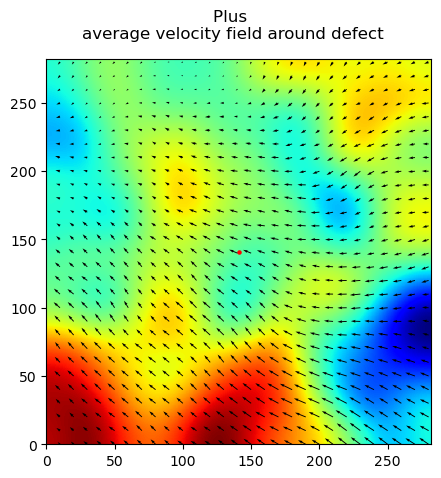

In [10]:
%matplotlib inline
from scipy.ndimage import gaussian_filter
# plot plus
# arr = np.load(r"C:\Users\user\Desktop\work\test_with_victor\velocity_around_plus\final_average_plus.npy")
# arr = np.load(r"C:\Users\user\Desktop\work\test_with_victor15 images\velocity_around_plus\final_average_plus.npy")
arr = np.load(r"C:\Users\victo\Downloads\SB_lab\HBEC\KenTest_s3\velocity_around_plus\final_average_plus.npy")

average_velocity_x = arr[:,:,0]
average_velocity_y = arr[:,:,1]

dx = 1
u_x, u_y = np.gradient(average_velocity_x)
v_x, v_y = np.gradient(average_velocity_y)

# Calculate the vorticity using OPTION1
vorticity = v_x - u_y
vorticity = gaussian_filter(vorticity, sigma=20)


image_shape = average_velocity_x.shape

step = 10
x = np.arange(0, arr.shape[1], step, dtype=np.int16)
y = np.arange(0, arr.shape[0], step, dtype=np.int16)

# Create a new figure and set the axis limits
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim([0, image_shape[1]])
ax.set_ylim([0, image_shape[0]])

center = np.array(arr.shape)/2
ax.imshow(vorticity, cmap="jet")
ax.scatter(center[1], center[0], marker='o', s=5, color='red')


# Plot the average velocity as arrows on the image
ax.quiver(x, y, average_velocity_x[::step,::step], average_velocity_y[::step,::step])
ax.set_box_aspect(1)
fig.suptitle('Plus \naverage velocity field around defect')

# Display the plot
plt.show()


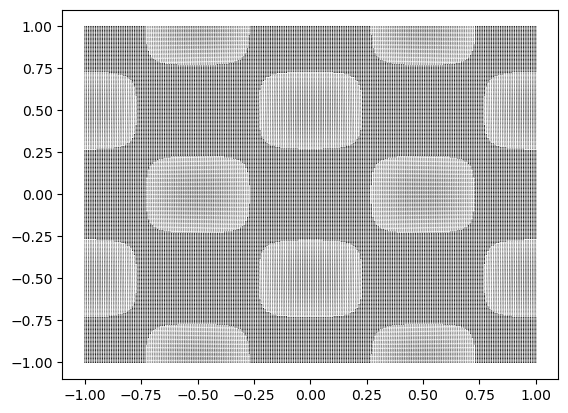

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D grid of x and y coordinates
x, y = np.meshgrid(np.linspace(-1, 1, 256), np.linspace(-1, 1, 256))

# Create a velocity field by defining the x and y components
vx = np.sin(np.pi * x) * np.cos(np.pi * y)
vy = -np.cos(np.pi * x) * np.sin(np.pi * y)

# Plot the velocity field using quiver plot
plt.figure()
plt.quiver(x, y, vx, vy)
plt.show()


### minus

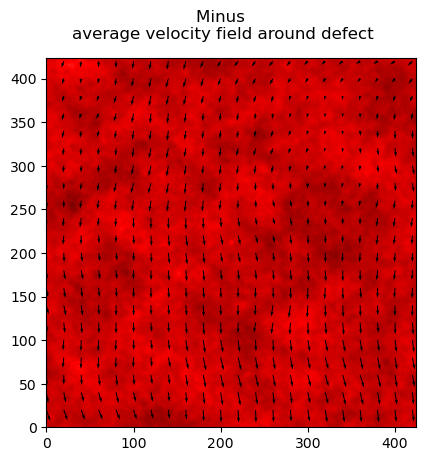

In [21]:
arr = np.load(r"C:\Users\user\Desktop\work\test_with_victor15 images\velocity_around_minus\final_average_minus.npy")
# plot plus
average_velocity_x = arr[:, :, 0]
average_velocity_y = arr[:, :, 1]

dx = 1
u_x, u_y = np.gradient(average_velocity_x, dx)
v_x, v_y = np.gradient(average_velocity_y, dx)

# Calculate the vorticity using OPTION1
vorticity = v_x - u_y

image_shape = average_velocity_x.shape

step = 20
x = np.arange(0, arr.shape[1], step, dtype=np.int16)
y = np.arange(0, arr.shape[0], step, dtype=np.int16)

# Create a new figure and set the axis limits
fig, ax = plt.subplots()
ax.set_xlim([0, image_shape[1]])
ax.set_ylim([0, image_shape[0]])

center = np.array(arr.shape) / 2
ax.imshow(vorticity, cmap="seismic")
ax.scatter(center[1], center[0], marker='o', s=5, color='red')

# Plot the average velocity as arrows on the image
ax.quiver(x, y, average_velocity_x[::step, ::step], average_velocity_y[::step, ::step])
ax.set_box_aspect(1)
# Display the plot
fig.suptitle('Minus \naverage velocity field around defect')
plt.show()


NameError: name 'u' is not defined

array([[-2.55026619, -1.58913548, -0.69026322, ...,  2.39696727,
         2.50688272,  2.47400821],
       [-1.82871479, -0.11894234, -0.29139824, ...,  2.52126388,
         2.6448299 ,  2.70192329],
       [ 0.30869805,  0.20316367,  0.07784972, ...,  2.57676858,
         2.74888709,  2.8752012 ],
       ...,
       [-2.68793271, -2.27963944, -1.96366425, ...,  8.42526288,
         8.13970784,  7.86411601],
       [-2.47113542, -2.01222638, -1.62651207, ...,  8.41152722,
         8.19183842,  7.95625697],
       [-2.26617656, -1.77970614, -1.31575371, ...,  8.3170344 ,
         8.12888783,  7.89917345]])

### TESTS

In [ ]:
%matplotlib qt
import os

import numpy as np

from image_series import *
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cv2

#path to the folder that contains the raw images.
path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\hbec"
path = r"C:\Users\user\Desktop\work\test\raw images"
# path = r"C:\Users\user\Desktop\work\check\raw"
window = [30,35,40,45]

In [ ]:
# for win in window:
#     IS = image_series(path, Optical_Flow_window=60, orientation_window=win,
#         save_defects=True,
#         save_orientation=True,
#         save_flow=True,
#         save_velocity= True)
#
#     IS.detect_defects()
#     im_path = r"C:\Users\user\Desktop\work\test\raw images\Trans__s2_0000.tif"
#     # im_path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\hbec\Trans__s2_0003.tif"
#     raw = cv2.imread(im_path)[:,:,0]
#
#     %matplotlib qt
#     # plushalf = pd.read_csv(r"C:\Users\user\Desktop\work\check\defects_csv\Trans__450_PlusHalf.csv")
#     # minushalf = pd.read_csv(r"C:\Users\user\Desktop\work\check\defects_csv\Trans__450_MinusHalf.csv")
#     plushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test\defects_csv\Trans__s2_0000_PlusHalf.csv")
#     minushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test\defects_csv\Trans__s2_0000_MinusHalf.csv")
#
#     pix_x = raw.shape[0]
#     pix_y = raw.shape[1]
#
#     x = np.arange(0,pix_x)
#     y = np.arange(0,pix_y)
#
#     xx, yy = np.meshgrid(x, y)
#
#     ori_path = r"C:\Users\user\Desktop\work\test\orientation\orientation_from_Trans__s2_0000.npy"
#     ori = np.load(ori_path)
#
#     fig, ax  = plt.subplots(figsize=(16,16))
#     s = 30
#     ax.imshow(raw, cmap='gray',origin= 'lower')
#     # ax.imshow(np.ones_like(raw)*16000, cmap= 'gray')
#     ax.quiver(xx[::s,::s], yy[::s,::s],
#         np.cos(ori)[::s,::s], np.sin(ori)[::s,::s],
#         headaxislength=0, headwidth=0, headlength=0,
#         color='lawngreen', scale=60, pivot='mid', alpha=.4)
#
#     ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=10,label=r'+1/2 defect')
#     ax.quiver(plushalf['x'], plushalf['y'],
#         np.cos(plushalf['ang1']), np.sin(plushalf['ang1']),
#         headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)
#
#     for i in range(3):
#         ax.quiver(minushalf['x'], minushalf['y'],
#             np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]),
#             headaxislength=0, headwidth=0, headlength=0, color='b', scale=50)
#     ax.set_title(f'image using {win}')
#     ax.set_xlabel('x (in pixels)')
#     ax.set_ylabel('y (in pixels)')
#     plt.show(block = False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

for win in window:
    IS = image_series(path, Optical_Flow_window=60, orientation_window=win,
                      save_defects=True,
                      save_orientation=True,
                      save_flow=True,
                      save_velocity=True)

    IS.detect_defects()
    im_path = r"C:\Users\user\Desktop\work\test\raw images\Trans__s2_0000.tif"
    # im_path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\hbec\Trans__s2_0003.tif"
    raw = cv2.imread(im_path)[:, :, 0]

    # set up a meshgrid to plot the orientation vectors on
    pix_x = raw.shape[0]
    pix_y = raw.shape[1]

    x = np.arange(0, pix_x)
    y = np.arange(0, pix_y)

    xx, yy = np.meshgrid(x, y)

    # load orientation data and create quiver plot
    ori_path = r"C:\Users\user\Desktop\work\test\orientation\orientation_from_Trans__s2_0000.npy"
    ori = np.load(ori_path)

    fig, ax = plt.subplots(figsize=(16, 16))
    s = 30
    ax.imshow(raw, cmap='gray')
    ax.quiver(xx[::s,::s], yy[::s,::s],
        np.cos(ori)[::s,::s], np.sin(ori)[::s,::s],
        headaxislength=0, headwidth=0, headlength=0,
        color='lawngreen', scale=60, pivot='mid', alpha=.3)

    # load defect data and add quiver plots for each defect
    plushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test\defects_csv\Trans__s2_0000_PlusHalf.csv")
    minushalf = pd.read_csv(r"C:\Users\user\Desktop\work\test\defects_csv\Trans__s2_0000_MinusHalf.csv")

    ax.plot(plushalf['x'], plushalf['y'], 'ro', markersize=10, label=r'+1/2 defect')
    ax.quiver(plushalf['x'], plushalf['y'],
              np.cos(plushalf['ang1']), np.sin(plushalf['ang1']),
              headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)

    for i in range(3):
        ax.quiver(minushalf['x'], minushalf['y'],
                  np.cos(minushalf['ang' + str(i + 1)]), np.sin(minushalf['ang' + str(i + 1)]),
                  headaxislength=0, headwidth=0, headlength=0, color='b', scale=50)

    ax.set_title(f'image using {win}')
    ax.set_xlabel('x (in pixels)')
    ax.set_ylabel('y (in pixels)')

    # save the figure as a PNG file
    plt.savefig(f"figure_{win}.png")

    # display the figure on the screen
    plt.show


In [ ]:
window = [30,40,50,60]
flow_window = [50,60,70,80]
path = r"C:\Users\user\Desktop\work\test\raw images"

for win in window:
    for f_win in flow_window:

        IS = image_series(path, orientation_window=win, Optical_Flow_window=f_win)
        IS.run_all()

        ## plot plus
        arr = np.load(r"C:\Users\user\Desktop\work\test\velocity_around_minus\final_average_minus.npy")

        average_velocity_x = arr[:,:,0]
        average_velocity_y = arr[:,:,1]

        image_shape = average_velocity_x.shape

        step = 20
        x = np.arange(0, arr.shape[1], step, dtype=np.int16)
        y = np.arange(0, arr.shape[0], step, dtype=np.int16)

        # Create a new figure and set the axis limits
        fig, ax = plt.subplots()
        ax.set_xlim([0, image_shape[1]])
        ax.set_ylim([0, image_shape[0]])

        center = np.array(arr.shape)/2
        ax.scatter(center[1], center[0], marker='o', s=5, color='red')


        # Plot the average velocity as arrows on the image
        ax.quiver(x, y, average_velocity_x[::step,::step], average_velocity_y[::step,::step])
        fig.suptitle(f'Plus \naverage velocity field around defect\n({win},{f_win})')

        #save the plot
        plt.savefig(f"average ori 50 figs window{win}, flow window {f_win}")
        # Display the plot

        plt.show()

        #run on window size = 40

        #run on window size = 45

In [ ]:
%matplotlib qt
from image_series import *
path = r"C:\Users\user\Desktop\work\test\raw images"
IS = image_series(path)
IS.velocity_averaging(400)